### Text Preprocessing

In this chapter, we are discussing the text preprocessing steps required before applying machine learning algorithms.
The steps include: cleaning, normalization, vectorization, and more.

1. NLP pipeline
2. Text Preprocessing:
   - with Pandas
   - with spaCy
3. Vectorization

The NLP pipeline is also known as the standard natural language processing workflow. This is similar to the data science workflow with extra steps.

Vectorization formats the text data in a way that a computer can process.

#### NLP Pipeline

Since the NLP pipeline is similar to a data science workflow, we will first explore its steps.

Step 1: Scoping a project (goal and what questions we want to answer)

Step 2: Gathering Data

Step 3: Cleaning Data

Step 4: Explore Data

Step 5: Modeling Data

Step 6: Share Insights

The NLP adds one more step between Cleaning Data and Exploring Data, which is called "Text Preprocessing."
This will ensure the data is ready to export and model.
Including the new step. Steps 2 to 5 are known as the NLP pipeline.

#### Text Preprocessing

Text preprocessing is about preparing raw data for analysis and modeling.

In the text preprocessing step, first, we may do Cleaning and Normalization (with Pandas or spaCy):
    
    Cleaning: Remove unnecessary text
    
    Normalization: Make text consistent

    Concepts:
    Lowering - Convert all text to lower case
    Special characters - Remove punctuation and special characters using regular expressions
    Tokenization - Split text into smaller units (words/sentences)
    Stemming/lemmatization - Reduce words to their root or base form
    Stop words - Remove common, non-essential words
    Parts of Speech (POS) tagging - Identifying grammatical roles of words (nouns, verbs, etc.)

Then, Vectorization (Turn text into a matrix of numbers).
    
    Here, each document (text) is represented by a vector of counts or TF-IDF (Term Frequency-Inverse Document Frequency) values.
    
    This can be done with scikit-learn

    Concepts:
    Document-Term Matrix (DTM) - Represent text by word frequency (known as Bag of Words)
    TF-IDF - Extension of DTM that weights words based on their importance.

Note: The order of steps may vary depending on the project.

Before moving forward, we will create a new environment called 'nlp_basics' and install the following:

    jupyter notebook
    matplotlib
    pandas
    python
    scikit-learn
    spaCy

#### Text Preprocessing with Pandas

Pandas can be used for simple text cleaning and normalization.

The following are the functions we will be using.

    str.lower() - Make all text lowercase
    str.replace() - To replace special characters (punctuation/numbers/...)

Note: Regular expressions (known as regex) allow you to find patterns (Extension to Ctrl+F).

##### Create Data Sets

In [1]:
import pandas as pd

In [2]:
data = [
    "When life gives you lemons, make lemonade! 🙂",
    "She bought 2 lemons for $1 at Maven Market.",
    "A dozen lemons will make a gallon of lemonade. [AllRecipes]",
    "lemon, lemon, lemons, lemon, lemon, lemons",
    "He's running to the market to get a lemon — there's a great sale today.",
    "Does Maven Market carry Eureka lemons or Meyer lemons?",
    "An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",
    "iced tea is my favorite"
]

In [3]:
data

['When life gives you lemons, make lemonade! 🙂',
 'She bought 2 lemons for $1 at Maven Market.',
 'A dozen lemons will make a gallon of lemonade. [AllRecipes]',
 'lemon, lemon, lemons, lemon, lemon, lemons',
 "He's running to the market to get a lemon — there's a great sale today.",
 'Does Maven Market carry Eureka lemons or Meyer lemons?',
 'An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]',
 'iced tea is my favorite']

In [4]:
### Is is a list. We first convert it to a dataframe.

pd.DataFrame(data)

,0
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade....
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — th...
5,Does Maven Market carry Eureka lemons or Meyer...
6,"An Arnold Palmer is half lemonade, half iced t..."
7,iced tea is my favorite


In [5]:
pd.DataFrame(data, columns=['sentence'])

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade....
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — th...
5,Does Maven Market carry Eureka lemons or Meyer...
6,"An Arnold Palmer is half lemonade, half iced t..."
7,iced tea is my favorite


In [6]:
data_df = pd.DataFrame(data, columns=['sentence'])
data_df

### Note that some of the sentences are cut off. We can fix this by changing Pandas options.

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade....
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — th...
5,Does Maven Market carry Eureka lemons or Meyer...
6,"An Arnold Palmer is half lemonade, half iced t..."
7,iced tea is my favorite


In [7]:
pd.set_option('display.max_colwidth', None)

### Note that this option will apply to all the codes.

In [8]:
data_df = pd.DataFrame(data, columns=['sentence'])
data_df

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]"
7,iced tea is my favorite


In [9]:
# create a test data set

test = [
    "We're going to start this course with traditional NLP applications.",
    "Then we'll move on to modern NLP theory.",
    "Finally, we'll wrap things up with modern NLP applications."
]

In [10]:
test_series = pd.Series(test)
test_series

### Noye: Here we are using Series (Just a single column). Data frames are more flexible, and we will be adding more columns to the data_df.

0    We're going to start this course with traditional NLP applications.
1                               Then we'll move on to modern NLP theory.
2            Finally, we'll wrap things up with modern NLP applications.
dtype: object

In [11]:
### Text Preprocessing with pandas

In [12]:
data_df

### We will add a column which shows cleaned version of the sentences.

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]"
7,iced tea is my favorite


In [13]:
### To keep the original data, we will first make a copy.

df1 = data_df.copy()
df1

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]"
7,iced tea is my favorite


In [14]:
### Step 1: Make text lower case.

In [15]:
df1['sentence'].str.lower()

0                               when life gives you lemons, make lemonade! 🙂
1                                she bought 2 lemons for $1 at maven market.
2                a dozen lemons will make a gallon of lemonade. [allrecipes]
3                                 lemon, lemon, lemons, lemon, lemon, lemons
4    he's running to the market to get a lemon — there's a great sale today.
5                     does maven market carry eureka lemons or meyer lemons?
6              an arnold palmer is half lemonade, half iced tea. [wikipedia]
7                                                    iced tea is my favorite
Name: sentence, dtype: object

In [16]:
df1['sentence_clean'] = df1['sentence'].str.lower()
df1

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂","when life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for $1 at maven market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade. [allrecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons","lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.,he's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]","an arnold palmer is half lemonade, half iced tea. [wikipedia]"
7,iced tea is my favorite,iced tea is my favorite


In [17]:
### Step 2: Remove text in square brackets.

In [18]:
df1['sentence_clean'].str.replace('[wikipedia]','')

### This works. However, it is very much manual. Thus, we will look for a pattern with regex

0                               when life gives you lemons, make lemonade! 🙂
1                                she bought 2 lemons for $1 at maven market.
2                a dozen lemons will make a gallon of lemonade. [allrecipes]
3                                 lemon, lemon, lemons, lemon, lemon, lemons
4    he's running to the market to get a lemon — there's a great sale today.
5                     does maven market carry eureka lemons or meyer lemons?
6                         an arnold palmer is half lemonade, half iced tea. 
7                                                    iced tea is my favorite
Name: sentence_clean, dtype: object

In [19]:
df1['sentence_clean'].str.replace(r'\[.*?\]', '', regex=True)

0                               when life gives you lemons, make lemonade! 🙂
1                                she bought 2 lemons for $1 at maven market.
2                            a dozen lemons will make a gallon of lemonade. 
3                                 lemon, lemon, lemons, lemon, lemon, lemons
4    he's running to the market to get a lemon — there's a great sale today.
5                     does maven market carry eureka lemons or meyer lemons?
6                         an arnold palmer is half lemonade, half iced tea. 
7                                                    iced tea is my favorite
Name: sentence_clean, dtype: object

In [20]:
df1['sentence_clean'] = df1['sentence_clean'].str.replace(r'\[.*?\]', '', regex=True)
df1

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂","when life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for $1 at maven market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade.
3,"lemon, lemon, lemons, lemon, lemon, lemons","lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.,he's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]","an arnold palmer is half lemonade, half iced tea."
7,iced tea is my favorite,iced tea is my favorite


In [21]:
### Step 3: Remove punctuations.

In [22]:
df1['sentence_clean'].str.replace(r'[^\w\s]', '', regex=True)

0                              when life gives you lemons make lemonade 
1                              she bought 2 lemons for 1 at maven market
2                         a dozen lemons will make a gallon of lemonade 
3                                  lemon lemon lemons lemon lemon lemons
4    hes running to the market to get a lemon  theres a great sale today
5                  does maven market carry eureka lemons or meyer lemons
6                       an arnold palmer is half lemonade half iced tea 
7                                                iced tea is my favorite
Name: sentence_clean, dtype: object

In [23]:
df1['sentence_clean'] = df1['sentence_clean'].str.replace(r'[^\w\s]', '', regex=True)
df1

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂",when life gives you lemons make lemonade
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for 1 at maven market
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade
3,"lemon, lemon, lemons, lemon, lemon, lemons",lemon lemon lemons lemon lemon lemons
4,He's running to the market to get a lemon — there's a great sale today.,hes running to the market to get a lemon theres a great sale today
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",an arnold palmer is half lemonade half iced tea
7,iced tea is my favorite,iced tea is my favorite


In [24]:
### Pro Tip:

### The above task can be performed with functions so that this can be applied to a different dataset without redundancy.

# df['sentence_clean'] = df['sentence'].str.lower()
# df['sentence_clean'] = df['sentence_clean'].str.replace(r'\[.*?\]', '', regex=True)
# df['sentence_clean'] = df['sentence_clean'].str.replace(r'[^\w\s]', '', regex=True)

def lower_replace(series):
    output = series.str.lower()
    output = output.str.replace(r'\[.*?\]', '', regex=True)
    output = output.str.replace(r'[^\w\s]', '', regex=True)
    return output

In [25]:
### Let's try this with test data.

test_series

0    We're going to start this course with traditional NLP applications.
1                               Then we'll move on to modern NLP theory.
2            Finally, we'll wrap things up with modern NLP applications.
dtype: object

In [26]:
lower_replace(test_series)

0    were going to start this course with traditional nlp applications
1                               then well move on to modern nlp theory
2             finally well wrap things up with modern nlp applications
dtype: object

In [27]:
### We can also try this with our original data.

df1.sentence

0                               When life gives you lemons, make lemonade! 🙂
1                                She bought 2 lemons for $1 at Maven Market.
2                A dozen lemons will make a gallon of lemonade. [AllRecipes]
3                                 lemon, lemon, lemons, lemon, lemon, lemons
4    He's running to the market to get a lemon — there's a great sale today.
5                     Does Maven Market carry Eureka lemons or Meyer lemons?
6              An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]
7                                                    iced tea is my favorite
Name: sentence, dtype: object

In [28]:
lower_replace(df1.sentence)

0                              when life gives you lemons make lemonade 
1                              she bought 2 lemons for 1 at maven market
2                         a dozen lemons will make a gallon of lemonade 
3                                  lemon lemon lemons lemon lemon lemons
4    hes running to the market to get a lemon  theres a great sale today
5                  does maven market carry eureka lemons or meyer lemons
6                       an arnold palmer is half lemonade half iced tea 
7                                                iced tea is my favorite
Name: sentence, dtype: object

In [29]:
### Next Object:

### We have given a flat file of the top 100 children's books over the past century.
### Use Pandas string functions to clean and normalize the text (lowercase, remove special characters, remove punctuations)

df2 = pd.read_csv('Chapter2_childrens_books.csv')

df2.head()

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education."
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice."
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading."


In [30]:
### Step 1: Lower case letters.

df2['Description_Clean'] = df2.Description.str.lower()
df2.head(2)

### Note: df['Description'] & df.Description works the same way. However, df['Description'] is formal and works all the time.

,Ranking,Title,Author,Year,Rating,Description,Description_Clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.","where the wild things are follows max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. as their king, max tames the beasts and eventually returns home to find his supper waiting for him. this iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.","the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. eric carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. the simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. it’s a staple in early childhood education."


In [31]:
### Step 2: Replace special characters.

df2['Description'].iloc[0]

### There is a special space, and it is captured by these characters.

"Where the Wild Things Are\xa0follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."

In [32]:
# df2['Description_Clean'] = df2['Description_Clean'].str.replace('\xa0', '')
# df2.head()

### Note that we need a space between the words. So the correct command is:

df2['Description_Clean'] = df2['Description_Clean'].str.replace('\xa0', ' ') # Keep a space between quatations
df2.head(2)

,Ranking,Title,Author,Year,Rating,Description,Description_Clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.","where the wild things are follows max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. as their king, max tames the beasts and eventually returns home to find his supper waiting for him. this iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.","the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. eric carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. the simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. it’s a staple in early childhood education."


In [33]:
### Step 3: Remove punctuations.

df2['Description_Clean'] = df2['Description_Clean'].str.replace(r'[^\w\s]', '', regex=True) # r is there to say we are dealing with a raw string
df2.head()

,Ranking,Title,Author,Year,Rating,Description,Description_Clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly eric carles use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers the simple engaging story introduces children to days of the week counting and the concept of metamorphosis its a staple in early childhood education
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",the giving tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life as the boy grows up he takes more from the tree and the tree continues to give even when it has little left silversteins minimalist text and illustrations convey deep themes of unconditional love selflessness and the passage of time it has sparked much discussion about relationships and sacrifice
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",in green eggs and ham samiam tries to convince a reluctant character to try a dish of green eggs and ham despite his resistance through repetition and rhyme dr seusss classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone the playful illustrations and humorous dialogue make it a fun and educational read for young readers
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making

#### Text Preprocessing with spaCy

The spaCy library can handle many NLP tasks, including tokenization, lemmatization, stop words, and more.

With spaCy, the first step is to turn a text into a spaCy doc object (we have to specify which language we will be using).

Tokenization: This allows us to break text up into smaller units (words). It will use whitespace to make tokens.

Lemmatization: Reduce words to their base form. This is a common way to normalize text. For this, spaCy uses a combination of linguistic rules and statistical models to lemmatize text. (Examples: i -> I, lemons -> lemon, selling -> sell)

Stop words: The words without any significant meaning (the, are, for, ...)

Parts of speech (POS) tagging: This allows us to label nouns, verbs, ... within text data. This is optional. Sometimes, use this as a filtering technique to only look at nouns and pronouns for analysis.

In [34]:
### Let's view the dataframe first

data = [
    "When life gives you lemons, make lemonade! 🙂",
    "She bought 2 lemons for $1 at Maven Market.",
    "A dozen lemons will make a gallon of lemonade. [AllRecipes]",
    "lemon, lemon, lemons, lemon, lemon, lemons",
    "He's running to the market to get a lemon — there's a great sale today.",
    "Does Maven Market carry Eureka lemons or Meyer lemons?",
    "An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",
    "iced tea is my favorite"
]

pd.DataFrame(data)

df1 = pd.DataFrame(data, columns=['sentence'])

df1['sentence_clean'] = df1['sentence'].str.lower()
df1['sentence_clean'] = df1['sentence_clean'].str.replace(r'\[.*?\]', '', regex=True)
df1['sentence_clean'] = df1['sentence_clean'].str.replace(r'[^\w\s]', '', regex=True)

df1.head()

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂",when life gives you lemons make lemonade
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for 1 at maven market
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade
3,"lemon, lemon, lemons, lemon, lemon, lemons",lemon lemon lemons lemon lemon lemons
4,He's running to the market to get a lemon — there's a great sale today.,hes running to the market to get a lemon theres a great sale today


In [35]:
import spacy

In [36]:
### Now we will load all the English models:

# nlp = spacy.load('en_core_web_sm')

### Note: The above code will give us an error. This is because we have to download this separately.

### Thus, we will go back to Anaconda Prompt and open a new window.

### Step 1: Change the environment ->  conda activate nlp_basics
### Step 2: Run -> python -m spacy download en_core_web_sm

### Now I should be able to load the English models

nlp = spacy.load('en_core_web_sm')

### Note: We can use 'nlp' to use all spaCy functionality.

In [37]:
### Let's use the first cleaned sentence to apply preprocessing techniques.

phrase = df1['sentence_clean'][0]
phrase

'when life gives you lemons make lemonade '

In [38]:
### First, we will convert this to a spaCy object

doc = nlp(phrase)

### Note: doc is a spaCy object

In [39]:
###  tokenize

[token for token in doc]

[when, life, gives, you, lemons, make, lemonade]

In [40]:
### These are the individual tokens in "doc". However, these are spaCy token objects. However, we need text objects. 

[token.text for token in doc]

['when', 'life', 'gives', 'you', 'lemons', 'make', 'lemonade']

In [41]:
### lemmatize

[token.lemma_ for token in doc]

['when', 'life', 'give', 'you', 'lemon', 'make', 'lemonade']

In [42]:
### Remove stop words

#### We can view all the words spaCy has labeled as stop words using the following command:

# list(nlp.Defaults.stop_words)

[token.lemma_ for token in doc if not token.is_stop]

### Note: Here, we are basically adding a condition to the end.

['life', 'give', 'lemon', 'lemonade']

In [43]:
### We can also make this a string

norm = [token.lemma_ for token in doc if not token.is_stop]

### We can join them with a space in between them.

' '.join(norm)

'life give lemon lemonade'

In [44]:
### We can put all these techniques into a function so that I can use it for a series of data.

def token_lemma_nostop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    output = ' '.join(output)
    return output

In [45]:
### Try the function on smaller test data first

test_series

0    We're going to start this course with traditional NLP applications.
1                               Then we'll move on to modern NLP theory.
2            Finally, we'll wrap things up with modern NLP applications.
dtype: object

In [46]:
test_series.apply(token_lemma_nostop)

0    go start course traditional NLP application .
1                              modern NLP theory .
2    finally , wrap thing modern NLP application .
dtype: object

In [47]:
### Now on df

df1.head()

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂",when life gives you lemons make lemonade
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for 1 at maven market
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade
3,"lemon, lemon, lemons, lemon, lemon, lemons",lemon lemon lemons lemon lemon lemons
4,He's running to the market to get a lemon — there's a great sale today.,hes running to the market to get a lemon theres a great sale today


In [48]:
### Preprocessing with Pandas

lower_replace(df1['sentence'])

0                              when life gives you lemons make lemonade 
1                              she bought 2 lemons for 1 at maven market
2                         a dozen lemons will make a gallon of lemonade 
3                                  lemon lemon lemons lemon lemon lemons
4    hes running to the market to get a lemon  theres a great sale today
5                  does maven market carry eureka lemons or meyer lemons
6                       an arnold palmer is half lemonade half iced tea 
7                                                iced tea is my favorite
Name: sentence, dtype: object

In [49]:
### Preprocessing with Pandas and spaCy

lower_replace(df1['sentence']).apply(token_lemma_nostop)

0                       life give lemon lemonade
1                     buy 2 lemon 1 maven market
2                    dozen lemon gallon lemonade
3            lemon lemon lemon lemon lemon lemon
4        s run market lemon   s great sale today
5    maven market carry eureka lemon meyer lemon
6       arnold palmer half lemonade half ice tea
7                               ice tea favorite
Name: sentence, dtype: object

In [50]:
### Parts of speech tagging

### We start with a one snetence and later we will make a function for this.

phrase2 = lower_replace(df1['sentence']).apply(token_lemma_nostop)[0]
phrase2

'life give lemon lemonade'

In [51]:
doc2 = nlp(phrase2)
doc2

life give lemon lemonade

In [52]:
[token.text for token in doc2]

['life', 'give', 'lemon', 'lemonade']

In [53]:
[(token.text, token.pos_) for token in doc2]

### Note: "lemonade" is identified as a propernoun. This happens as we are working with cleaned text.
### If we work with raw text, it will identify this correctly, considering the context.

[('life', 'NOUN'), ('give', 'VERB'), ('lemon', 'NOUN'), ('lemonade', 'PROPN')]

In [54]:
### Let's try to return all the nouns

[(token.text, token.pos_) for token in doc2 if token.pos_ in ['NOUN', 'PROPN']]

[('life', 'NOUN'), ('lemon', 'NOUN'), ('lemonade', 'PROPN')]

In [55]:
[token.text for token in doc2 if token.pos_ in ['NOUN', 'PROPN']]

['life', 'lemon', 'lemonade']

In [56]:
### Let's join this for later analysis

nouns = [token.text for token in doc2 if token.pos_ in ['NOUN', 'PROPN']]
' '.join(nouns)

'life lemon lemonade'

In [57]:
### Now we are turning this into a function
### We slightly modify the above code for flexibility (we can decide pos list)

def filter_pos(text, pos_list = ['NOUN', 'PROPN']):
    doc = nlp(text)
    output = [token.text for token in doc if token.pos_ in pos_list]
    output = ' '.join(output)
    return output

In [58]:
### On test data

test_series

0    We're going to start this course with traditional NLP applications.
1                               Then we'll move on to modern NLP theory.
2            Finally, we'll wrap things up with modern NLP applications.
dtype: object

In [59]:
test_series.apply(filter_pos)

0    course NLP applications
1                 NLP theory
2    things NLP applications
dtype: object

In [60]:
### On main dataframe. Note, we have now done three levels of text preprocessing.

df1

,sentence,sentence_clean
0,"When life gives you lemons, make lemonade! 🙂",when life gives you lemons make lemonade
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for 1 at maven market
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade
3,"lemon, lemon, lemons, lemon, lemon, lemons",lemon lemon lemons lemon lemon lemons
4,He's running to the market to get a lemon — there's a great sale today.,hes running to the market to get a lemon theres a great sale today
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",an arnold palmer is half lemonade half iced tea
7,iced tea is my favorite,iced tea is my favorite


In [61]:
### Level 1:

lower_replace(df1['sentence'])

0                              when life gives you lemons make lemonade 
1                              she bought 2 lemons for 1 at maven market
2                         a dozen lemons will make a gallon of lemonade 
3                                  lemon lemon lemons lemon lemon lemons
4    hes running to the market to get a lemon  theres a great sale today
5                  does maven market carry eureka lemons or meyer lemons
6                       an arnold palmer is half lemonade half iced tea 
7                                                iced tea is my favorite
Name: sentence, dtype: object

In [62]:
### Level 2:

lower_replace(df1['sentence']).apply(token_lemma_nostop)

0                       life give lemon lemonade
1                     buy 2 lemon 1 maven market
2                    dozen lemon gallon lemonade
3            lemon lemon lemon lemon lemon lemon
4        s run market lemon   s great sale today
5    maven market carry eureka lemon meyer lemon
6       arnold palmer half lemonade half ice tea
7                               ice tea favorite
Name: sentence, dtype: object

In [63]:
### Level 3:

lower_replace(df1['sentence']).apply(token_lemma_nostop).apply(filter_pos)

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [64]:
### Note: Order of applying the preprocessing is important. For example: 

lower_replace(df1['sentence']).apply(filter_pos).apply(token_lemma_nostop)

### Output is slightly different.

0              life lemon lemonade
1               lemon maven market
2      dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon
4          market lemon sale today
5        market eureka lemon lemon
6              palmer lemonade tea
7                              tea
Name: sentence, dtype: object

In [65]:
### Question: Which order is the correct order?

### Answer: It depends on the data.

#### NLP Pipeline

In [66]:
### Now we are combining all the text preprocessing techniques into one function

### We will start with row text and go through 3 text preprocessing techniques.

### Following are the functions we defined earlier. These are parts of a bigger function, and thus, these are called helper functions.

def lower_replace(series):
    output = series.str.lower()
    output = output.str.replace(r'\[.*?\]', '', regex=True)
    output = output.str.replace(r'[^\w\s]', '', regex=True)
    return output

def token_lemma_nostop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    output = ' '.join(output)
    return output

def filter_pos(text, pos_list = ['NOUN', 'PROPN']):
    doc = nlp(text)
    output = [token.text for token in doc if token.pos_ in pos_list]
    output = ' '.join(output)
    return output

In [67]:
def nlp_pipeline(series):
    output = lower_replace(series)
    output = output.apply(token_lemma_nostop)
    output = output.apply(filter_pos)
    return output

In [68]:
### First try with test data:

nlp_pipeline(test_series)

0          nlp application
1               nlp theory
2    thing nlp application
dtype: object

In [69]:
### Now with original dataframe:

nlp_pipeline(df1['sentence'])

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [70]:
### If we want to save the output to use in another notebook and do not want to apply the NLP pipeline again, we can save it as a "dap pickle file".

text_clean = nlp_pipeline(df1['sentence'])
text_clean

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [71]:
### Save the file:

pd.to_pickle(text_clean, 'text_clean.pkl')

In [72]:
### Question: Why not save it as a Word/Excel file?

### Answer: Reading and writing a pickle file is very fast and works well with Python objects.

### Note: pickel file are not readable. 

In [73]:
### Task: Text preprocessing of the description of children's books using spaCy.

### Note: We carried out text preprocessing with Pandas, and we will further clean it using spaCy.

In [74]:
df2 = pd.read_csv('Chapter2_childrens_books.csv')

df2.head()

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education."
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice."
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading."


In [75]:
### Cleaning with Pandas:

df2['Description_Clean'] = df2.Description.str.lower()

df2['Description_Clean'] = df2['Description_Clean'].str.replace('\xa0', ' ')

df2['Description_Clean'] = df2['Description_Clean'].str.replace(r'[^\w\s]', '', regex=True)

df2.head(2)

,Ranking,Title,Author,Year,Rating,Description,Description_Clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly eric carles use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers the simple engaging story introduces children to days of the week counting and the concept of metamorphosis its a staple in early childhood education


In [76]:
### We start with the first entry:

desc = df2['Description_Clean'][0]
desc

'where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story'

In [77]:
### Make it a spaCy object

doc = nlp(desc)
doc

where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story

In [78]:
### Tokenize:

[token.text for token in doc]

['where',
 'the',
 'wild',
 'things',
 'are',
 'follows',
 'max',
 'a',
 'young',
 'boy',
 'who',
 'after',
 'being',
 'sent',
 'to',
 'his',
 'room',
 'for',
 'misbehaving',
 'imagines',
 'sailing',
 'to',
 'an',
 'island',
 'filled',
 'with',
 'wild',
 'creatures',
 'as',
 'their',
 'king',
 'max',
 'tames',
 'the',
 'beasts',
 'and',
 'eventually',
 'returns',
 'home',
 'to',
 'find',
 'his',
 'supper',
 'waiting',
 'for',
 'him',
 'this',
 'iconic',
 'book',
 'explores',
 'themes',
 'of',
 'imagination',
 'adventure',
 'and',
 'the',
 'complex',
 'emotions',
 'of',
 'childhood',
 'all',
 'captured',
 'through',
 'sendaks',
 'whimsical',
 'illustrations',
 'and',
 'story']

In [79]:
### Lemmatize:

[token.lemma_ for token in doc]

['where',
 'the',
 'wild',
 'thing',
 'be',
 'follow',
 'max',
 'a',
 'young',
 'boy',
 'who',
 'after',
 'be',
 'send',
 'to',
 'his',
 'room',
 'for',
 'misbehave',
 'imago',
 'sail',
 'to',
 'an',
 'island',
 'fill',
 'with',
 'wild',
 'creature',
 'as',
 'their',
 'king',
 'max',
 'tame',
 'the',
 'beast',
 'and',
 'eventually',
 'return',
 'home',
 'to',
 'find',
 'his',
 'supper',
 'wait',
 'for',
 'he',
 'this',
 'iconic',
 'book',
 'explore',
 'theme',
 'of',
 'imagination',
 'adventure',
 'and',
 'the',
 'complex',
 'emotion',
 'of',
 'childhood',
 'all',
 'capture',
 'through',
 'sendak',
 'whimsical',
 'illustration',
 'and',
 'story']

In [80]:
### Stop words:

[token.lemma_ for token in doc if not token.is_stop]

['wild',
 'thing',
 'follow',
 'max',
 'young',
 'boy',
 'send',
 'room',
 'misbehave',
 'imago',
 'sail',
 'island',
 'fill',
 'wild',
 'creature',
 'king',
 'max',
 'tame',
 'beast',
 'eventually',
 'return',
 'home',
 'find',
 'supper',
 'wait',
 'iconic',
 'book',
 'explore',
 'theme',
 'imagination',
 'adventure',
 'complex',
 'emotion',
 'childhood',
 'capture',
 'sendak',
 'whimsical',
 'illustration',
 'story']

In [81]:
' '.join([token.lemma_ for token in doc if not token.is_stop])

'wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story'

In [82]:
### Note that we need to do this for the entire column. So we will put all the steps into a function.

def token_lemma_nonstop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    return output

In [83]:
df2['Description_Clean'].apply(token_lemma_nonstop)

### Note that every value is a list of tokens. However, we would like to see that as a string.

0                                       [wild, thing, follow, max, young, boy, send, room, misbehave, imago, sail, island, fill, wild, creature, king, max, tame, beast, eventually, return, home, find, supper, wait, iconic, book, explore, theme, imagination, adventure, complex, emotion, childhood, capture, sendak, whimsical, illustration, story]
1                       [hungry, caterpillar, tell, story, caterpillar, eat, variety, food, eventually, butterfly, eric, carles, use, colorful, collage, illustration, rhythmic, text, book, beloved, classic, young, reader, simple, engaging, story, introduce, child, day, week, counting, concept, metamorphosis, staple, early, childhood, education]
2                                                           [give, tree, touching, bittersweet, story, tree, give, boy, course, life, boy, grow, take, tree, tree, continue, little, left, silverstein, minimalist, text, illustration, convey, deep, theme, unconditional, love, selflessness, passage, time, spa

In [84]:
def token_lemma_nonstop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    output = ' '.join(output)
    return output

In [85]:
df2['Description_Clean'].apply(token_lemma_nonstop)

0                                    wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story
1                  hungry caterpillar tell story caterpillar eat variety food eventually butterfly eric carles use colorful collage illustration rhythmic text book beloved classic young reader simple engaging story introduce child day week counting concept metamorphosis staple early childhood education
2                                                   give tree touching bittersweet story tree give boy course life boy grow take tree tree continue little left silverstein minimalist text illustration convey deep theme unconditional love selflessness passage time spark discussion relationship sacrifice
3              green egg ham samiam try convince reluctant character try dish green egg 

In [86]:
df2['Description_Clean'] = df2['Description_Clean'].apply(token_lemma_nonstop)

df2.head()

,Ranking,Title,Author,Year,Rating,Description,Description_Clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",hungry caterpillar tell story caterpillar eat variety food eventually butterfly eric carles use colorful collage illustration rhythmic text book beloved classic young reader simple engaging story introduce child day week counting concept metamorphosis staple early childhood education
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",give tree touching bittersweet story tree give boy course life boy grow take tree tree continue little left silverstein minimalist text illustration convey deep theme unconditional love selflessness passage time spark discussion relationship sacrifice
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",green egg ham samiam try convince reluctant character try dish green egg ham despite resistance repetition rhyme dr seusss classic story open new experience encourage child adventurous try thing outside comfort zone playful illustration humorous dialogue fun educational read young reader
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading.",goodnight moon gentle rhythmic bedtime story little bunny say goodnight room moon quiet old lady whispering hush repetitive structure comfort tone ideal young child simple illustration clement hurd complement soothe nature story make beloved classic sleeptime reading


#### Vectorization

Vectorization is the process of converting text data into numeric data so that future data analysis and machine learning can be applied.

- Most ML techniques require text data to be cleaned, normalized, and in a numeric format
- Some techniques, such as sentiment analysis, require text data to be in its raw text form (cz word order matters)

Vectorization Techniques:

- Word Counts (we have a set of words and count how many times each word appears)
- TF-IDF (Similar to "Word Counts". However, instead of counts, we have decimal values)
- Embeddings (a bit advanced and uses deep learning)

We start with Word Counts and TF-IDF. Embeddings will be discussed later.

Once clean and normalized data is obtained, it will be turned into a "Document-Term Matrix (DTM)" for vectorization.
In DTM, each row represents a document, and each column represents a term.
A DTM is a 'bag of words' representation of text (each document is represented by how often words appear, regardless of word order).
In some simple cases, this works really well.

Creating a Count Vectorizer object to make a DTM in Python (Example):

from sklearn.feature_extraction.text import CounVectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), mid_df=2)

stop_words='english': Language to remove stop words for

ngram_range=(1,2): Range of the sequence of words to be considered as a term in DTM

Examples:

    (1,1) - "data" (default)
    (1,2) - "data","data science" (bigrams)
    (3,3) - "data science workflow" (only three-word terms (trigrams))

mid_df=2: (minimum document frequency) Number of/percent of documents a term needs to appear in to be included in the DTM (default==1)

Note: We are removing stop words again. It is because we are using two different libraries (spaCy and sklearn). If we are doing more linguistics anlaysis using spaCy, they use spaCy stop words removal. But if you are working with dataframes and machine learning, then we can use sklearn to remove stop words.

#### Count Vectorizer

In [87]:
### Here we will be using the "text_clean" we created earlier.
### Since we saved it as a pickle file, we will load it first.

import pandas as pd

series = pd.read_pickle('text_clean.pkl')
series

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [89]:
### DTM:

cv.fit_transform(series)

### This will say it is creating a Sparse matrix and save the locations of non-zero values.
### Since this is not readable to us, we change this to a readable format.

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 27 stored elements and shape (8, 15)>

In [90]:
dtm = cv.fit_transform(series)
pd.DataFrame(dtm.toarray())

### Now we can see the full DTM

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,0,1,0,0,0,0,2,0,0,1,1,0,0,0,0
6,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
7,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [91]:
### Note that in the above DTM, columns do not contain terms. We can fix this:

dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df

,dozen,eureka,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,0,1,0,0,0,0,2,0,0,1,1,0,0,0,0
6,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
7,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [92]:
### Count Vectorizer with Parameters

### Note: token_pattern='(?u)\\b\\w\\w+\\b' (Default) - With this, it only considers terms with more than two characters.

cv2 = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=5)
dtm2 = cv2.fit_transform(series)
pd.DataFrame(dtm2.toarray())
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns=cv2.get_feature_names_out())
dtm_df2

### min_df and max_df help to get rid of low-frequency and high-frequency terms.
### Low-frequency words may not be helpful to compare documents, as they are rare to see.
### High-frequency words may not be helpful to distinguish documents, as they appear in most of the documents.
### min_df and max_df can also be percentages

cv2 = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.2, max_df=0.8)
dtm2 = cv2.fit_transform(series)
pd.DataFrame(dtm2.toarray())
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns=cv2.get_feature_names_out())
dtm_df2

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


In [93]:
### Exploratory Data Analysis

term_freq = dtm_df2.sum()
term_freq

ice              2
ice tea          2
lemon           12
lemon lemon      6
lemonade         3
market           3
maven            2
maven market     2
tea              2
dtype: int64

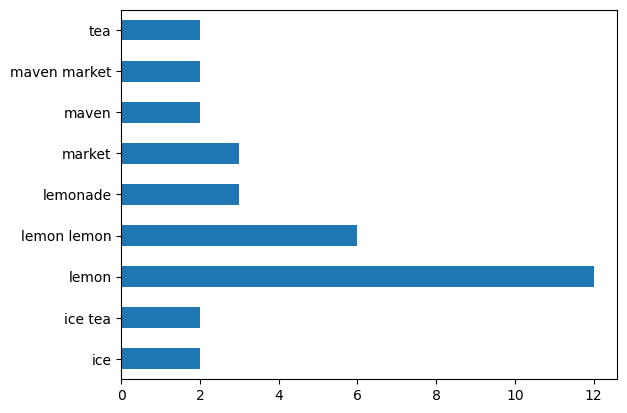

In [94]:
term_freq.plot(kind='barh');

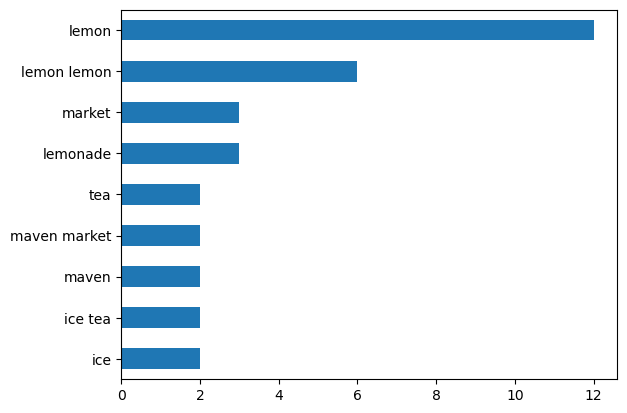

In [95]:
term_freq.sort_values().plot(kind='barh');

In [96]:
### Tasks: Visualize the top 10 most common terms in the descriptions (from children's book). 
###        Also, share the less common terms that appear in multiple book descriptions.

1. Vectorize the cleaned and normalized text using Count Vectorizer with the default parameters
2. Modify the Count Vectorizer parameters to reduce the number of columns:
* Remove stop words
* Set a minimum document frequency of 10%
3. Use the updated Count Vectorizer to identify the:
* Top 10 most common terms
* Top 10 least common terms that appear in at least 10% of the documents
4. Create a horizontal bar chart of the top 10 most common terms

In [97]:
df2.head(2)

,Ranking,Title,Author,Year,Rating,Description,Description_Clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",hungry caterpillar tell story caterpillar eat variety food eventually butterfly eric carles use colorful collage illustration rhythmic text book beloved classic young reader simple engaging story introduce child day week counting concept metamorphosis staple early childhood education


In [98]:
cv3 = CountVectorizer()
dtm3 = cv3.fit_transform(df2['Description_Clean'])
dtm3_df = pd.DataFrame(dtm3.toarray(), columns=cv3.get_feature_names_out())
dtm3_df

,19th,207,30story,aa,aaron,ability,aboard,absurd,absurdity,acceptance,...,worldbuilde,wrap,wrinkle,write,writing,wrong,year,young,zany,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [99]:
cv4 = CountVectorizer(stop_words='english', min_df=0.10)
dtm4 = cv4.fit_transform(df2['Description_Clean'])
dtm4_df = pd.DataFrame(dtm4.toarray(), columns=cv4.get_feature_names_out())
dtm4_df

,adventure,beloved,book,boy,character,charming,child,classic,courage,early,...,tale,teach,tell,text,theme,timeless,way,whimsical,world,young
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
97,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
98,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
### Most common terms

top_terms = dtm4_df.sum().sort_values().tail(10)
top_terms

explore          30
theme            33
classic          36
adventure        39
reader           54
illustration     54
young            64
child            66
book             75
story           106
dtype: int64

In [101]:
### Least common terms

bottom_terms = dtm4_df.sum().sort_values().head(10)
bottom_terms

joy            10
perfect        10
favorite       10
embark         10
early          10
magical        11
importance     11
imagination    11
girl           11
imaginative    11
dtype: int64

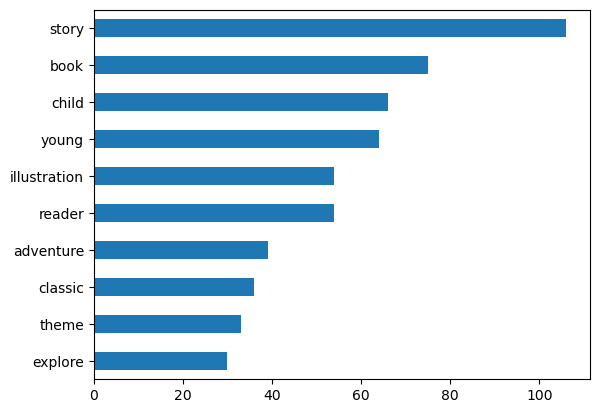

In [102]:
### Horizontal bar chart for the most common terms

top_terms.plot(kind='barh');

#### TF-IDF (Term Frequency - Inverse Document Frequency)

TF-IDF is an alternative to the word count calculation in a DTM. This will emphasizes the important words by reducing the impact of common words.

$$
\text{TF-IDF}
=
\frac{\text{Term count in document}}
{\text{Total terms in document}}
\times
\log\left(
\frac{\text{Total documents}+1}
{\text{Documents with the term}+1}
\right)
== \text{Term Frequency} \times \text{Inverse Document Frequency}
$$


The above formular will be calculated for every cell in the DTM.

The "Term Frequency" solve the issue that high counts dominates (especifically for high frequency words or long documents) by converting them into a percentage (normalizing).

"Inverse Document Frequency": This highlights the importance (assign more weights) of a rare word. When counting words, each term has equal weight.

In [103]:
### Python code for TF-IDF vectorizer is quite similar to Count Vectorizer

#### TF-IDF Vectorizer

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
series

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [106]:
tv = TfidfVectorizer()
tfidf = tv.fit_transform(series)
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tv.get_feature_names_out())
tfidf_df

,dozen,eureka,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375318,0.543168,0.75107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411442,0.000000,0.00000,0.595449,0.690041,0.000000,0.000000,0.000000,0.000000
2,0.600547,0.000000,0.000000,0.600547,0.000000,0.000000,0.300100,0.434311,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300100,0.000000,0.00000,0.434311,0.000000,0.000000,0.600547,0.000000,0.600547
5,0.000000,0.556913,0.000000,0.000000,0.000000,0.000000,0.556591,0.000000,0.00000,0.402755,0.466736,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.504577,0.422875,0.000000,0.364907,0.00000,0.000000,0.000000,0.504577,0.000000,0.422875,0.000000
7,0.000000,0.000000,0.644859,0.000000,0.000000,0.540443,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.540443,0.000000


In [107]:
tv2 = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.20, max_df=0.80)
tfidf2 = tv2.fit_transform(series)
tfidf_df2 = pd.DataFrame(tfidf2.toarray(), columns=tv2.get_feature_names_out())
tfidf_df2

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0.000000,0.000000,0.568471,0.000000,0.822704,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.338644,0.000000,0.000000,0.490093,0.567948,0.567948,0.000000
2,0.000000,0.000000,0.568471,0.000000,0.822704,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.581897,0.813262,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.568471,0.000000,0.000000,0.822704,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.524634,0.439939,0.000000,0.379631,0.439939,0.439939,0.000000
6,0.516768,0.516768,0.000000,0.000000,0.445928,0.000000,0.000000,0.000000,0.516768
7,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350


In [108]:
### Task:

1. Vectorize the cleaned and normalized text using TF-IDF Vectorizer with the default parameters
2. Modify the TF-IDF Vectorizer parameters to reduce the number of columns:
* Remove stop words
* Set a minimum document frequency of 10%
* Set a maximum document frequency of 50%
3. Using the updated TF-IDF Vectorizer, create a  horizontal bar chart of the top 10 most highly weighted terms
4. Compare the Count Vectorizer bar chart from the previous assignment with the TF-IDF Vectorizer bar chart and note the differences in the top term lists

In [109]:
df2.head(2)

,Ranking,Title,Author,Year,Rating,Description,Description_Clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",hungry caterpillar tell story caterpillar eat variety food eventually butterfly eric carles use colorful collage illustration rhythmic text book beloved classic young reader simple engaging story introduce child day week counting concept metamorphosis staple early childhood education


In [110]:
tv3 = TfidfVectorizer()
tfidf3 = tv3.fit_transform(df2['Description_Clean'])
tfidf3_df = pd.DataFrame(tfidf3.toarray(), columns=tv3.get_feature_names_out())
tfidf3_df

,19th,207,30story,aa,aaron,ability,aboard,absurd,absurdity,acceptance,...,worldbuilde,wrap,wrinkle,write,writing,wrong,year,young,zany,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.059325,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.064643,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.054494,0.0,0.172525
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.059258,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15893,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.130180,0.000000,0.0,0.000000
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.132833,0.000000,0.0,0.000000


In [111]:
tv4 = TfidfVectorizer(stop_words='english', min_df=0.10, max_df=0.50)
tfidf4 = tv4.fit_transform(df2['Description_Clean'])
tfidf4_df = pd.DataFrame(tfidf4.toarray(), columns=tv4.get_feature_names_out())
tfidf4_df

,adventure,beloved,boy,character,charming,classic,courage,early,embark,engage,...,simple,tale,teach,tell,text,theme,timeless,way,whimsical,world
0,0.306065,0.000000,0.436081,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.310439,0.000000,0.000000,0.436081,0.000000
1,0.000000,0.357193,0.000000,0.00000,0.0,0.273303,0.000000,0.438717,0.0,0.0,...,0.344196,0.000000,0.000000,0.301902,0.415937,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.695432,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.356375,0.247534,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.37829,0.0,0.272536,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.418150,0.000000,0.00000,0.0,0.319944,0.000000,0.000000,0.0,0.0,...,0.402935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.00000,0.0,0.607668,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463859,0.000000,0.474868,0.000000
97,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.336742,0.000000,0.000000,0.000000,0.462063
98,0.310365,0.000000,0.000000,0.00000,0.0,0.000000,0.465112,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.314801,0.000000,0.000000,0.000000,0.000000


In [112]:
tfidf4_df.sum()

### Greater the sum, the higher the importance. In other words, the most frequently and uniquely appearing term across the documents.

adventure       9.170431
beloved         5.736197
boy             5.522424
character       5.284426
charming        4.066705
classic         9.025850
courage         4.354438
early           3.515784
embark          3.678149
engage          5.490613
explore         7.930213
family          4.812912
favorite        3.648917
follow          7.539421
friendship      6.576614
fun             4.548425
gentle          3.641622
girl            3.970964
humor           5.984106
humorous        6.165330
imagination     4.255407
imaginative     3.781213
importance      3.663389
introduce       4.730778
joy             3.428162
learn           6.024657
lesson          6.497657
life            5.073379
little          5.550173
love            6.459629
magical         3.994955
make            6.980265
message         4.460692
narrative       4.375278
novel           4.386150
perfect         2.920536
playful         6.538079
read            5.878903
reader         11.410736
rhyme           4.685457


In [113]:
top_weights = tfidf4_df.sum().sort_values().tail(10)
top_weights

friendship     6.576614
make           6.980265
follow         7.539421
series         7.600068
tell           7.695622
explore        7.930213
theme          8.058044
classic        9.025850
adventure      9.170431
reader        11.410736
dtype: float64

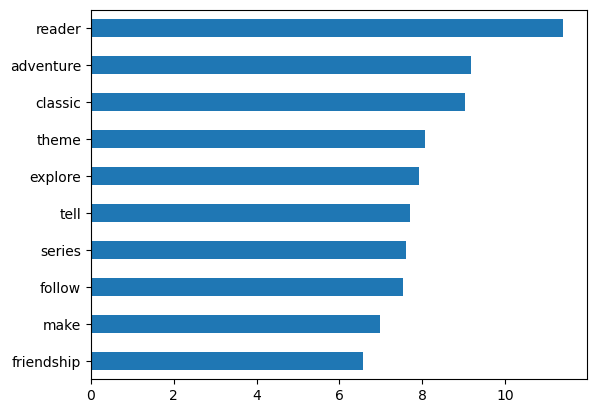

In [114]:
top_weights.plot(kind='barh');

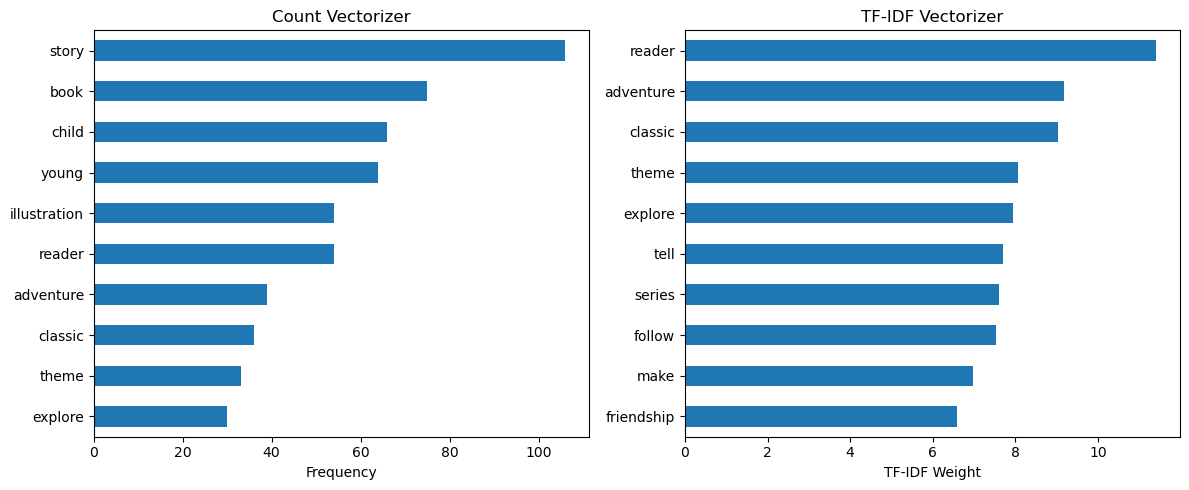

In [115]:
### Compare bar charts for Count Vectorizer and TF-IDF Vectorizer (using ChatGPT)

import matplotlib.pyplot as plt

# Create figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Count Vectorizer
top_terms.plot(kind='barh', ax=axes[0])
axes[0].set_title("Count Vectorizer")
axes[0].set_xlabel("Frequency")

# Second subplot: TF-IDF Vectorizer
top_weights.plot(kind='barh', ax=axes[1])
axes[1].set_title("TF-IDF Vectorizer")
axes[1].set_xlabel("TF-IDF Weight")

# Improve spacing
plt.tight_layout()
plt.show()

In [116]:
### Note that less common terms have higher score in TF-IDF.

Key Takeaways:

- NLP projects have an extra text preprocessing step in the data science workflow
- Text cleaning and normalization can be done using Pandas and spaCy
- Vectorization is the process of making text numeric for future analysis
